In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
os.listdir()

['anothertest.ipynb',
 'b1797683-c5b0-4e97-968e-8605a009b1ab.zip',
 'c3ff606d-2eda-4ce6-9274-4b9a14abaa84.zip',
 'Datasets',
 'Getting Started.ipynb',
 'IMGClass',
 'Logs',
 'Model',
 'Python Ilt Session.py',
 'test2.ipynb',
 'testboof.ipynb',
 'tsjsCourse',
 'TutsDataset']

In [3]:
data_dir = "TutsDataset"
os.listdir(data_dir)

['Cats', 'Dogs']

In [4]:
src_data_Dogs = os.path.join(data_dir, "Dogs")
src_data_Cats = os.path.join(data_dir, "Cats")

print(len(os.listdir(src_data_Cats)))
print(len(os.listdir(src_data_Dogs)))

85
87


In [5]:
gpus = tf.config.experimental.list_physical_devices("GPU")
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [6]:
import cv2
import imghdr

C:\Users\Diaz R\AppData\Local\Temp\ipykernel_21628\4232469594.py:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [7]:
image_exts = ["jpeg", "jpg", "bmp", "png"]

In [8]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

In [9]:
img = cv2.imread(os.path.join("TutsDataset", "Cats", "Cat_August_2010-4.jpg"))

In [10]:
img.shape

(2226, 3640, 3)

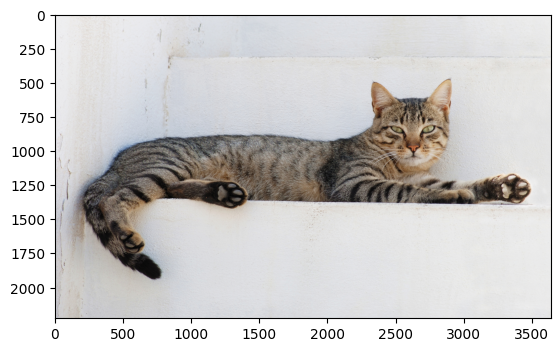

In [11]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [12]:
data = tf.keras.utils.image_dataset_from_directory("TutsDataset")

Found 172 files belonging to 2 classes.


In [13]:
data_iterator = data.as_numpy_iterator()
data_iterator

In [14]:
batch = data_iterator.next()
#error, find why

In [15]:
batch[0].shape

(32, 256, 256, 3)

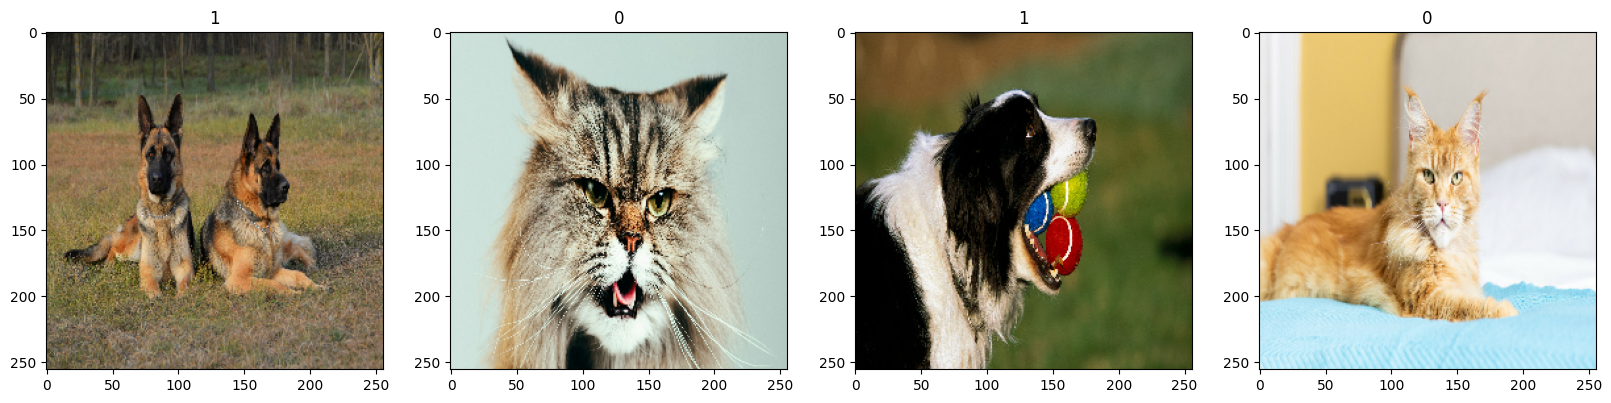

In [16]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [17]:
#data aug
#scaling
data = data.map(lambda x,y: (x/255,y))

In [18]:
data.as_numpy_iterator().next()

(array([[[[0.96862745, 0.96862745, 0.96862745],
          [0.96862745, 0.96862745, 0.96862745],
          [0.96862745, 0.96862745, 0.96862745],
          ...,
          [0.96994877, 0.96994877, 0.96994877],
          [0.96862745, 0.96862745, 0.96862745],
          [0.97085553, 0.97085553, 0.97085553]],
 
         [[0.972549  , 0.972549  , 0.972549  ],
          [0.972549  , 0.972549  , 0.972549  ],
          [0.972549  , 0.972549  , 0.972549  ],
          ...,
          [0.97324604, 0.97324604, 0.97324604],
          [0.9766468 , 0.9766468 , 0.9766468 ],
          [0.9764706 , 0.9764706 , 0.9764706 ]],
 
         [[0.9684819 , 0.9684819 , 0.9684819 ],
          [0.96850127, 0.96850127, 0.96850127],
          [0.9708027 , 0.9708027 , 0.9708027 ],
          ...,
          [0.97275937, 0.97275937, 0.97275937],
          [0.97246146, 0.97246146, 0.97246146],
          [0.97240347, 0.97240347, 0.97240347]],
 
         ...,
 
         [[0.96862745, 0.96862745, 0.96862745],
          [0.96864

In [37]:
#split

train_size = int(len(data)*.8)
val_size = int(len(data)*.1)
test_size = int(len(data)*.1)

In [38]:
train_size

4

In [21]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [22]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [30]:
model = tf.keras.Sequential(
    [
    tf.keras.layers.Conv2D(16, (3,3), 1, activation= "relu", input_shape = (256,256,3)),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32, (3,3), 1, activation= "relu"),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(16, (3,3), 1, activation= "relu"),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(1, activation= "sigmoid")
])

In [40]:
model.compile(
    loss= "binary_crossentropy",
    optimizer= tf.keras.optimizers.RMSprop(.05),
    metrics= ["accuracy"]
)

In [41]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 127, 127, 16)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 flatten_2 (Flatten)         (None, 57600)            

In [43]:
logdir = "Logs"
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)
history = model.fit(train,steps_per_epoch= 8 , epochs=20, validation_data= val, callbacks= [tensorboard_callback])

Epoch 1/20
8/8 [==============================] - 5s 433ms/step - loss: 0.6952 - accuracy: 0.4844 - val_loss: 0.6938 - val_accuracy: 0.4375


<function matplotlib.pyplot.show(close=None, block=None)>

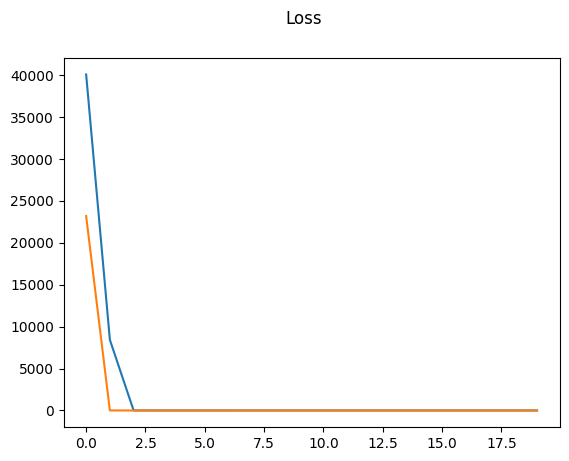

In [34]:
fig = plt.figure()
plt.plot(history.history["loss"], label="loss")
plt.plot(history.history["val_loss"], label = "val loss")
fig.suptitle("Loss")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

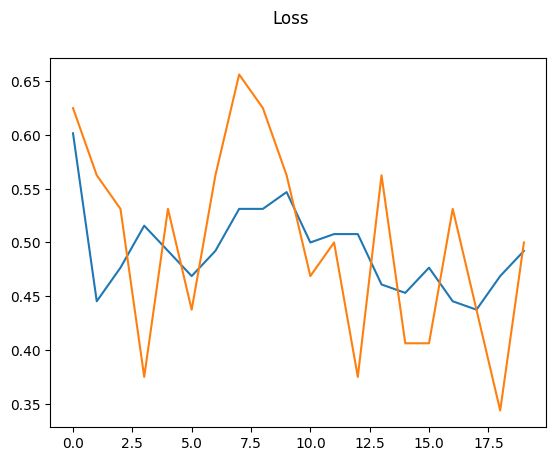

In [39]:
fig = plt.figure()
plt.plot(history.history["accuracy"], label="accuracy")
plt.plot(history.history["val_accuracy"], label = "val acc")
fig.suptitle("Loss")
plt.show

In [44]:
model.save("Model/Testmodel1")

INFO:tensorflow:Assets written to: Model/Testmodel1\assets


INFO:tensorflow:Assets written to: Model/Testmodel1\assets
